# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

<span style="color:teal">This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

<span style="color:teal">Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

<span style="color:teal">In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


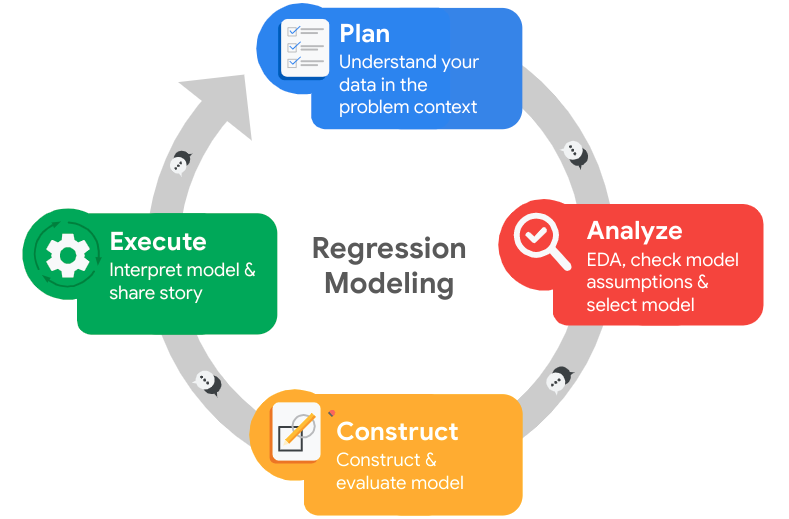

## **Pace: Plan**

<span style="color:teal">Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

<span style="color:teal">In this stage, consider the following:

### Understand the business scenario and problem

<span style="color:teal">The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

<span style="color:teal">Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

<span style="color:teal">If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

<span style="color:teal">The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

<span style="color:teal">**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### <span style="color:teal">Reflect on these questions as you complete the plan stage.</span>

##### <span style="color:teal">Who are your stakeholders for this project?</span>

HR department, Senior Management, and potentially team leads or department heads.

##### <span style="color:teal">What are you trying to solve or accomplish?</span>

The primary goal is to decipher the data to discern patterns and correlations that indicate why an employee might decide to leave. By predicting these patterns, the company can take preemptive measures to retain talent.

##### <span style="color:teal">What are your initial observations when you explore the data?</span>

- There might be a correlation between job satisfaction and the decision to leave.
- The number of hours an employee works, their salary, and their recent evaluations could be potential indicators.
- The presence of work accidents or lack of promotions might also play a role in an employee's decision.

##### <span style="color:teal">What resources do you find yourself using as you complete this stage?</span>

- Kaggle for data sourcing.
- Statistical software or programming languages (like Python or R) for data analysis and model building.
- Articles, journals, or research on employee turnover and retention strategies.

##### <span style="color:teal">Do you have any ethical considerations in this stage?</span>

- Ensure data privacy: Employee details should be anonymized to maintain confidentiality.
- Bias: The dataset should be scrutinized to make sure it doesn't reflect any biases that could skew the predictive model.
- Transparency: Stakeholders should be informed about the methodologies used and any potential limitations of the model.



## Step 1. Imports

- <span style="color:teal">Import packages</span>   
- <span style="color:teal">Load dataset</span>



### Import packages

In [99]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

<span style="color:teal">`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- <span style="color:teal">Understand your variables
- <span style="color:teal">Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

<span style="color:teal">As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [33]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'years_at_company',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident',
       'left_company', 'promotion_last_5_years', 'department', 'salary_usd'],
      dtype='object')

### Check missing values

<span style="color:teal">Check for any missing values in the data.

In [36]:
# Check for missing values
df0.isnull().sum()

satisfaction_level        0
last_evaluation           0
num_projects              0
average_monthly_hours     0
years_at_company          0
work_accident             0
left_company              0
promotion_last_5_years    0
department                0
salary_usd                0
dtype: int64

### Check duplicates

<span style="color:teal">Check for any duplicate entries in the data.

In [37]:
# Check for duplicates
df0.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [38]:
# Inspect some rows containing duplicates as needed
duplicates = df0[df0.duplicated()]
duplicates.head(20)

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left_company,promotion_last_5_years,department,salary_usd
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [39]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left_company,promotion_last_5_years,department,salary_usd
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [40]:
# Checking that duplicates are removed
duplicates = df1[df1.duplicated()]
duplicates.shape

(0, 10)

### Check outliers

<span style="color:teal">Check for outliers in the data.

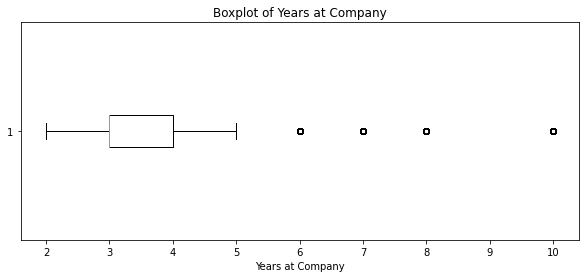

In [41]:
# Create a boxplot to visualize distribution of 'years_at_company' and detect any outliers
plt.figure(figsize=(10, 4))  # Set the size of the figure
plt.boxplot(df1['years_at_company'], vert=False)
plt.title('Boxplot of Years at Company')
plt.xlabel('Years at Company')
plt.show()



In [42]:
# Determine the number of rows containing outliers

# List of columns to check
columns_to_check = ['satisfaction_level', 
                    'last_evaluation', 
                    'num_projects', 
                    'average_monthly_hours', 
                    'years_at_company']

# For each column, calculate the number of outliers
for col in columns_to_check:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    num_outliers = len(outliers)
    
    print(f"Number of rows containing outliers for {col}: {num_outliers}")


Number of rows containing outliers for satisfaction_level: 0
Number of rows containing outliers for last_evaluation: 0
Number of rows containing outliers for num_projects: 0
Number of rows containing outliers for average_monthly_hours: 0
Number of rows containing outliers for years_at_company: 824


<span style="color:teal">Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
<span style="color:teal">Perform EDA (analyze relationships between variables)</span>



💭
### <span style="color:teal">Reflect on these questions as you complete the analyze stage.</span>

##### <span style="color:teal">What did you observe about the relationships between variables?</span>

- There was a positive correlation between the number of projects, average monthly hours, and last evaluation scores, indicating that employees involved in more projects tended to work longer hours and received higher evaluations.
- A negative correlation was observed between satisfaction levels and the likelihood of leaving the company, suggesting that lower employee satisfaction was associated with increased turnover.
- Employees managing seven projects all left the company, with their working hours being significantly higher than average, pointing to possible overwork.
- The optimal range for project allocation appeared to be 3-4 projects, beyond which the likelihood of leaving increased.

##### <span style="color:teal">What do you observe about the distributions in the data?</span>

- A majority of employees worked more than the standard expected hours, hinting at a culture of overwork.
- There were distinctive groups of employees who left the company; one group exhibited lower satisfaction despite standard working hours, while another group worked excessive hours with low satisfaction levels.

##### <span style="color:teal">What transformations did you make with your data? Why did you chose to make those decisions?</span>

- Renaming columns for standardization to snake_case and correcting any misspellings to maintain consistency.
- Duplicates were identified and removed to ensure the uniqueness of data points.
- Outliers, especially in years at the company, were examined and considered for removal based on the type of model used, as certain models are sensitive to outliers.

##### <span style="color:teal">What are some purposes of EDA before constructing a predictive model?</span>

- To understand the underlying structure and relationships within the data.
- To identify any anomalies, outliers, or patterns that could influence the model's performance.
- To make informed decisions about feature selection, transformation, and engineering to improve model accuracy.

##### <span style="color:teal">What resources do you find yourself using as you complete this stage?</span>

- Python libraries such as Pandas for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-learn for modeling.
- Statistical methods to calculate correlations, distributions, and perform hypothesis testing.
- Domain knowledge and previous research to guide the interpretation of data and selection of features.

##### <span style="color:teal">Do you have any ethical considerations in this stage?</span>

- Ensuring that the data used for analysis does not violate privacy or data protection laws.
- Being transparent about the features used in the model and the rationale behind their selection.
- Considering the impact of the model on employees, such as how it might affect those identified as likely to leave.

## Step 2. Data Exploration (Continue EDA)

<span style="color:teal">Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [43]:
# Get numbers of people who left vs. stayed
left_count = df1['left_company'].sum()
stayed_count = len(df1) - left_count

print(f"Number of people who left: {left_count}")
print(f"Number of people who stayed: {stayed_count}")

# Get percentages of people who left vs. stayed
left_percentage = (left_count / len(df1)) * 100
stayed_percentage = 100 - left_percentage

print(f"Percentage of people who left: {left_percentage:.2f}%")
print(f"Percentage of people who stayed: {stayed_percentage:.2f}%")

Number of people who left: 1991
Number of people who stayed: 10000
Percentage of people who left: 16.60%
Percentage of people who stayed: 83.40%


## Data visualizations

<span style="color:teal">Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

To initiate the analysis, we will construct a stacked boxplot to elucidate the `average_monthly_hours` distributions across different `number_project` categories, contrasting the trends between employees who remained with the company versus those who departed.

While box plots offer invaluable insights into data distributions, their interpretation can be skewed if we are unaware of the underlying sample sizes. Thus, complementing this with a stacked histogram would be prudent to gain a clearer understanding of the `number_project` distribution for both the retention and attrition groups.

### Monthly hours & number of projects

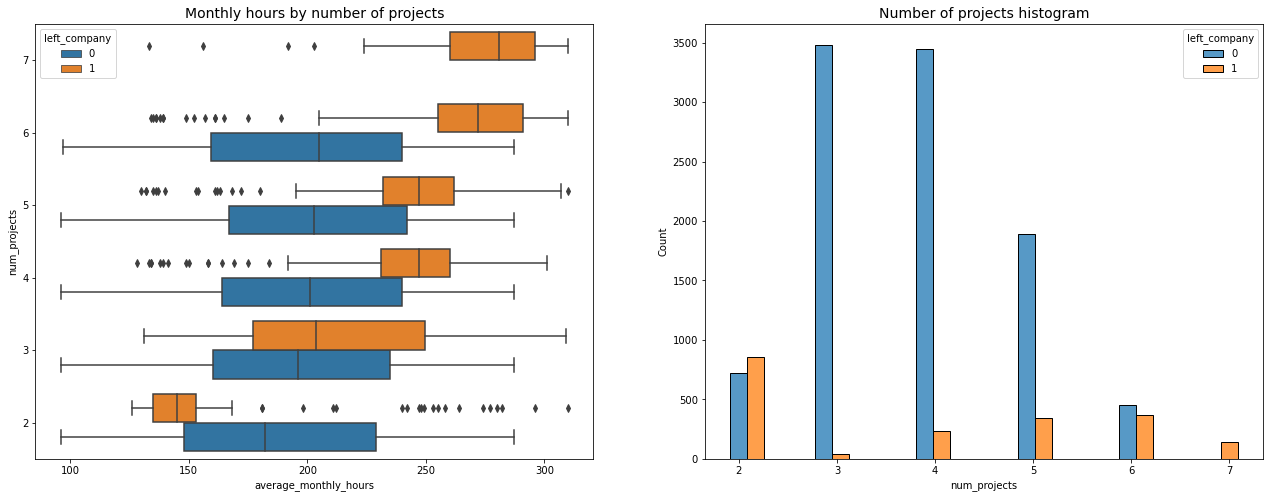

In [56]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='num_projects', hue='left_company', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left_company']==0]['num_projects']
tenure_left = df1[df1['left_company']==1]['num_projects']
sns.histplot(data=df1, x='num_projects', hue='left_company', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

Upon analyzing the provided charts, several insights emerge regarding the relationship between the number of projects undertaken by an employee, their monthly working hours, and their decision to remain in or leave the company:

1. **Trend Between Projects and Working Hours**: There is a clear linear relationship between the number of projects and average monthly hours logged by employees. As the number of projects increases, the average monthly working hours also increase for both employees who stayed and those who left. 


2. **High Variance for Employees with Mid-level Projects**: Employees managing between 3 to 5 projects display a higher variance in their working hours, especially those who left the company. There are two distinct groups within this range:
   - **Cohort A**: Employees who worked significantly fewer hours than their counterparts despite handling a similar number of projects. This suggests these individuals might be either underperforming or are less engaged, leading to a potential risk of attrition.
   - **Cohort B**: On the other end of the spectrum, employees who worked considerably longer hours despite managing the same number of projects. These individuals are likely to be high-performers or overburdened, which could lead to burnout and them deciding to exit the company.


3. **Potential Overwork and Burnout**: Alarmingly, all employees managing seven projects have left the company, and their working hours ranged from 255 to 295 hours monthly, which is significantly above average. This strongly indicates that employees at this level of project responsibility are likely overburdened, leading to increased attrition.


4. **Optimal Project Allocation**: The data suggests that employees handling 3 to 4 projects have the lowest rates of attrition, indicating an optimal balance between responsibility and work-life balance for these individuals. This is further emphasized by the histogram, which shows a pronounced dip in employees leaving the company within this project range.


5. **Pervasive Overwork**: If we consider a typical 40-hour working week as a standard, most of the employees, except for those handling two projects, are logging more than the usual working hours. This signifies a potential culture of overwork within the organization that could be detrimental in the long run.


In conclusion, while there's a clear relationship between project counts and working hours, the nuances within each project range highlight potential areas of concern. Employees at both extremes—either underworked or overburdened—are at a higher risk of leaving the company. To reduce attrition, a detailed exploration into work allocation, project management, and employee wellness initiatives would be highly beneficial.

In [59]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['num_projects']==7]['left_company'].value_counts()

1    145
Name: left_company, dtype: int64

All employees with 7 projects did, in fact, leave the company.

### Monthly hours & employee satisfaction

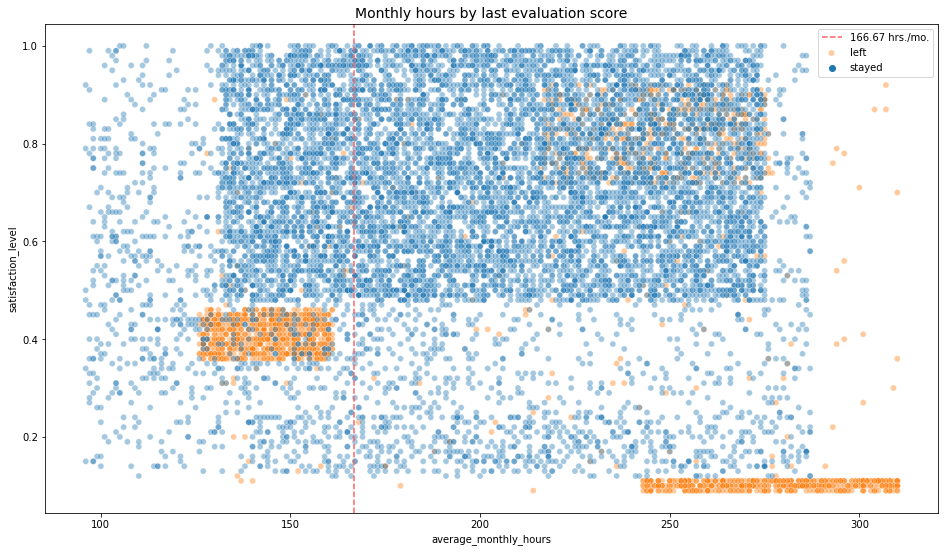

In [60]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

From the scatterplot presented, depicting the relationship between the average monthly hours worked and the last evaluation score (indicative of satisfaction level), several insights can be drawn:

1. **Overworked and Dissatisfied**: The most conspicuous cluster, demarcated by orange dots, represents employees who work between approximately 240 to 315 hours a month and report alarmingly low satisfaction scores. Working upwards of 75 hours weekly for an entire year is daunting and could invariably be tied to the deep-seated dissatisfaction observed within this group. Such demanding work schedules are unsustainable and are significant red flags for employee burnout and attrition.

2. **Moderate Hours but Low Satisfaction**: Another salient group of employees works standard hours, near the median (as indicated by the red dashed line), yet report a satisfaction score hovering around the 0.4 mark. This might imply other underlying organizational issues that go beyond mere work hours. The juxtaposition of these employees with those logging excessive hours could intensify the perception of a demanding work culture, where more is always expected, further deteriorating their job satisfaction.


3. **Balanced Work-Life and High Satisfaction**: A more balanced group of employees, working between 210 to 280 hours a month, exhibit relatively high satisfaction scores, ranging between 0.7 to 0.9. This emphasizes the potential sweet spot for employee workload, where they feel challenged but not overwhelmed, leading to a higher degree of contentment.


4. **Possible Data Anomalies**: There is a peculiar pattern in the distribution, especially with a dense congregation of points on the extreme right. This might hint at potential data anomalies or artificial data entry. It's crucial to vet and validate the source and integrity of this data before deriving any concrete conclusions.


5. **Sparse Data Points**: It's also worth noting the sparsity of data points for extremely high satisfaction levels combined with minimal work hours. This could imply that very few employees achieve high satisfaction with fewer working hours or that such configurations are rare within the organization.


In summation, the data underscores the delicate equilibrium between work hours and satisfaction. While it's evident that overburdening employees leads to discontent, merely ensuring standard working hours doesn't guarantee satisfaction. It's imperative for the organization to probe deeper, understanding the qualitative factors affecting employee morale and tailoring interventions accordingly.

### Satisfaction level & years at the company

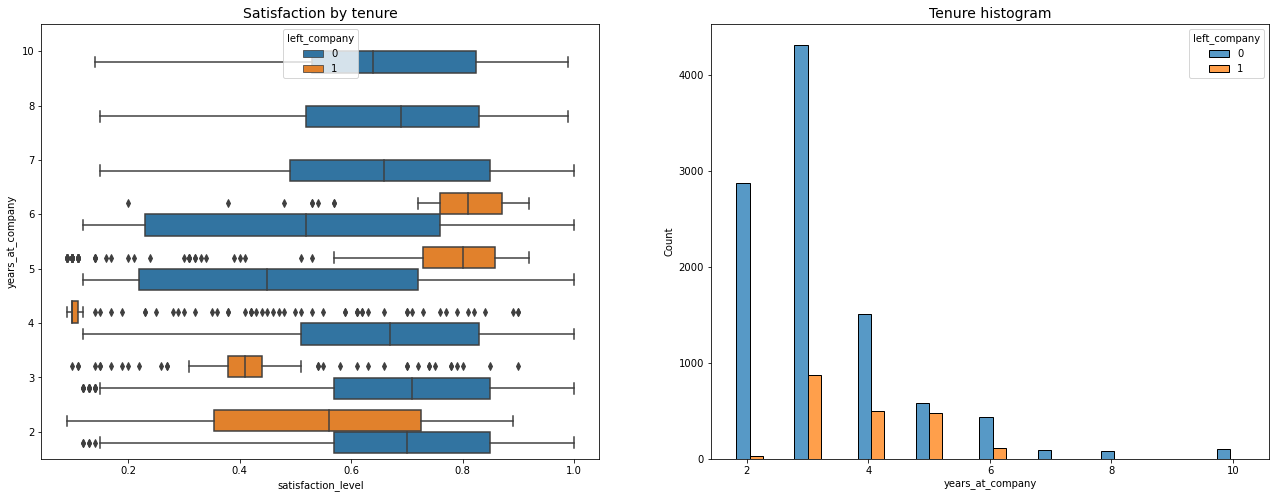

In [65]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='years_at_company', hue='left_company', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left_company']==0]['years_at_company']
tenure_left = df1[df1['left_company']==1]['years_at_company']
sns.histplot(data=df1, x='years_at_company', hue='left_company', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Analyzing the given visualizations, several patterns and inferences can be drawn, shedding light on employee satisfaction and tenure:

1. **Two Main Departure Groups**: The box plot titled "Satisfaction by tenure" emphasizes that there are two prominent clusters of departed employees: 
   - **Short Tenure, Low Satisfaction**: Employees who have spent relatively fewer years (2 or less) at the company and report low satisfaction levels. This could indicate that many new hires or employees early in their tenure are finding the initial experience at the company unsatisfactory.
   - **Intermediate Tenure, Mixed Satisfaction**: Employees with around four years of tenure, some of whom report high satisfaction, have chosen to leave. This is intriguing and suggests that factors beyond immediate job satisfaction (e.g., better opportunities, personal reasons, career shifts) might be influencing their decision to depart.


2. **Four-Year Tenure Concern**: The four-year mark seems pivotal. A significant number of departures occur around this tenure, especially among those with lower satisfaction. It's imperative for the organization to retrospect and assess what might be triggering dissatisfaction and turnover specifically around this tenure. Were there any policy shifts, management changes, or restructuring around this period? 


3. **Loyalty among Long-Timers**: Employees with the longest tenures (close to 10 years and beyond) showcase steadfast allegiance to the organization, with no departures recorded. Their satisfaction levels, interestingly, are comparable to those of newer employees who opted to stay. This indicates a strong organizational culture or benefits that cater to long-term employees, solidifying their commitment.


4. **Histogram Insights**: The histogram, titled "Tenure histogram", underscores a relative scarcity of employees with extended tenures. Given the limited numbers in these higher tenure brackets, it's plausible that these are individuals in senior positions, possibly with increased compensation and perks that make them less likely to depart.


5. **Further Analytical Steps**: To glean deeper insights from these patterns:
   - **Descriptive Statistics**: Compute average and median satisfaction scores for both departed and retained employees. This will help in quantifying the central tendencies of satisfaction for these groups.
   - **Segmentation Analysis**: Break down the data by other variables (e.g., department, role, compensation) to discern if certain segments are more prone to departure or dissatisfaction.
   - **Exit Interviews & Surveys**: Conduct qualitative research, like exit interviews, to ascertain the reasons behind the departures, especially for those anomalies like satisfied employees at the four-year mark choosing to leave.


In conclusion, while tenure and satisfaction are valuable metrics, understanding the interplay of other variables and qualitative factors will provide a holistic understanding of employee dynamics within the organization.

In [67]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left_company'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left_company,,
0,0.667365,0.69
1,0.440271,0.41


As hypothesized, both the average and central tendency of satisfaction scores for employees who departed are notably inferior compared to their counterparts who persisted with the organization. An intriguing observation is the slight lag of the mean satisfaction score below the median for the group of employees who remained. This characteristic suggests a potential left-skewness in the satisfaction distribution for this cohort.

Building on this, the subsequent line of inquiry could focus on dissecting salary distributions across varied tenure lengths.

### Salary & years at the company

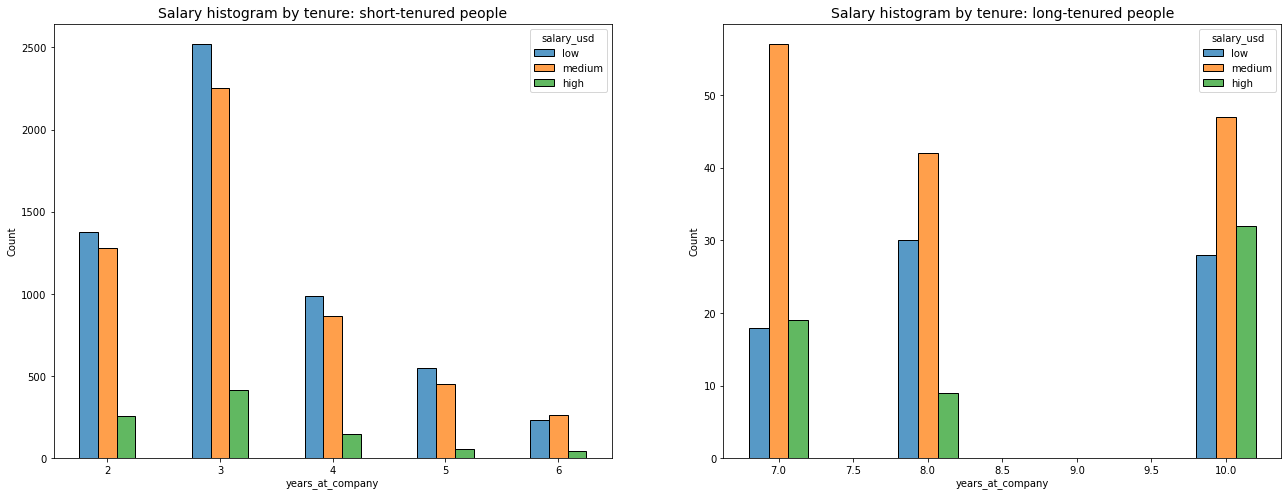

In [70]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['years_at_company'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['years_at_company'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='years_at_company', hue='salary_usd', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='years_at_company', hue='salary_usd', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The provided histograms furnish valuable insights into salary distributions based on tenure:

1. **Short-tenured Employees (0-6 years)**:
   - The most substantial representation in the 2-year tenure bracket is those with a 'low' salary grade, suggesting that a large fraction of newer employees are in entry-level roles or roles that offer lower compensation.
   - Interestingly, at the 3-year mark, we see a decline in the number of employees in the 'low' salary range and an increase in the 'medium' salary range. This could point to salary adjustments or promotions happening around this time. However, the 'high' salary bracket remains minimal, underscoring the idea that it takes more than a few years of tenure to enter the top pay grades.
   - There's a noticeable drop in the number of employees beyond 3 years, regardless of their salary grades. This reduction could be due to various reasons - attrition, lateral movements, or transitions to higher roles, indicating a need for deeper examination.


2. **Long-tenured Employees (7-10 years)**:
   - Even with longer tenures of 7 to 10 years, the 'high' salary grade remains underrepresented. The 'medium' salary bracket seems to dominate, which is intriguing. This observation aligns with the initial assertion that prolonged tenure isn't necessarily an indicator of being in the top salary brackets.
   - It's also noteworthy that the total count of employees in these long tenure categories is much smaller. While this could be due to natural career progressions, where only a few stay with the same organization for extended periods, it might also point to opportunities for further inquiry into the organization's retention strategies and career growth opportunities.


Given these observations, a few analytical approaches could be adopted to delve deeper:

1. **Performance vs. Salary & Tenure**: As suggested, analyzing the relationship between average monthly hours worked, last evaluation scores, and salary could yield insights into whether the organization rewards dedication and performance with salary hikes and promotions.
   - A scatterplot or a heatmap showcasing `average_monthly_hours` vs. `last_evaluation`, color-coded by salary grade, would be an effective way to visualize this relationship.
   
   
2. **Cross-referencing with Previous Data**: It would be beneficial to integrate this data with the satisfaction and departure insights from the previous dataset. Such an approach would provide a holistic view of how salary, tenure, satisfaction, and attrition interplay.


3. **Segmentation by Department or Role**: Breaking down the data by department or specific roles might offer clarity on which sectors of the organization have clearer paths to high salary brackets with tenure and which do not.


In summary, while tenure is an essential metric, its direct correlation with salary seems ambiguous in this context. It's vital to consider other variables, like performance, role, department, and external market factors, to paint a comprehensive picture of an employee's career trajectory within the organization.

### Monthly hours & last evaluation

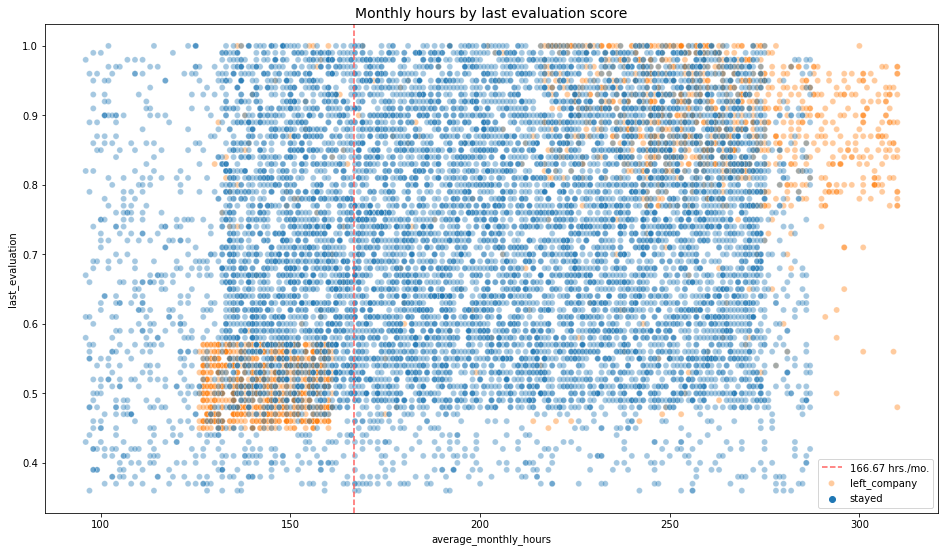

In [73]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left_company', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot effectively illustrates the relationship between the average monthly hours an employee works and their last evaluation score, with an added layer of information on whether an employee has left or stayed with the company.

1. **Overworked High Performers**: A salient cluster in the upper right quadrant captures the employees who have both high evaluation scores and high monthly work hours. Surprisingly, a notable portion of these employees, indicated in orange, left the company. This could signify that while these employees were high performers and committed, they may have felt overworked or not sufficiently rewarded or recognized for their efforts, leading to their exit.


2. **Underperforming & Underworked**: The lower left quadrant indicates another cluster of employees who left the company (again in orange) – those with lower evaluation scores and fewer work hours. This suggests that they might have been disengaged or unsatisfied with their roles or may not have fit well within the company’s culture or expectations.


3. **Relation between Work Hours and Evaluation**: As you rightly pointed out, while there is a discernible positive correlation between work hours and evaluation scores, it's not strictly linear. This underscores that performance is not solely a function of the number of hours put in.


4. **Dense Region Beyond the Threshold**: The dense region to the right of the 166.67 hours line could be indicative of a culture of overtime or possibly an expectation to consistently work beyond the standard working hours. This has implications for work-life balance and could be a factor in employee attrition.


5. **Sparse Upper Left Quadrant**: As observed, the upper left quadrant isn't densely populated. This suggests that while working fewer hours, getting a high evaluation score is rare, further emphasizing the correlation between hours worked and performance evaluations.


6. **Broad Implications**: The significant presence of employees who left the company, both in the high performing and lower performing brackets, calls for a deeper examination of retention strategies. There could be underlying factors, such as lack of growth opportunities, inadequate recognition, or unsatisfactory compensation, prompting these exits.


Given the insights from the plot, a potential next step would be:
- **Promotion Analysis**: Examining the promotion history of the employees, especially those in the high-performing but overworked bracket, can be illuminating. By understanding how many of these employees received promotions or raises recently, the organization can gauge if its reward mechanisms are in sync with employee efforts and expectations.


Furthermore, it might be beneficial to conduct exit interviews or surveys for departing employees to get qualitative insights into their reasons for leaving. This can offer valuable context to the patterns observed in the data and inform strategies to enhance retention and employee satisfaction. 

### Monthly hours & promotions

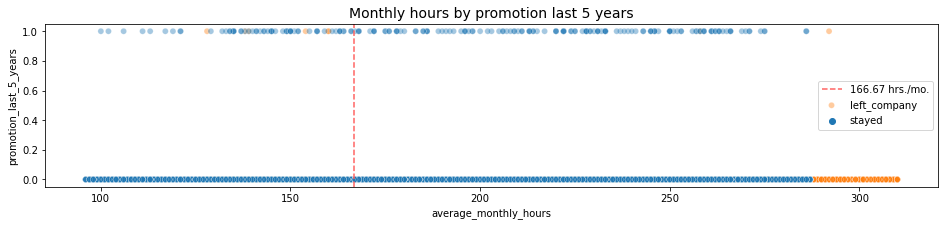

In [76]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5_years', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left_company', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The scatterplot provides a comprehensive view of the relationship between monthly working hours and promotions received by employees in the past five years, further delineated by those who left or stayed with the company.

1. **Promotion as a Retention Tool**: As observed, the vast majority of employees who were promoted in the last five years chose to stay with the company. This underscores the importance of career advancement opportunities as a tangible tool to boost employee loyalty and morale. When employees perceive growth prospects in their current roles, they are more likely to stay committed to the organization.


2. **Hours Worked vs Promotion**: An intriguing insight is the sparse representation of promoted employees amongst those working the highest number of monthly hours. This could indicate that the company values performance metrics other than just the number of hours worked. As inferred, aspects like work quality, skills, collaboration, and leadership potential may hold more weightage in promotional decisions.


3. **High Work Hours and Attrition**: It is striking to note that employees working the most extended hours predominantly comprise those who left the company. This suggests potential challenges related to work-life balance and the risks of burnout. Prolonged working hours might not be sustainable in the long run and can lead to employee dissatisfaction, adversely impacting their mental and physical well-being.


4. **Recommendation for Further Analysis**:
   - **Departmental Analysis**: As rightly pointed out, a department-wise segmentation can be beneficial. This would help pinpoint if certain departments have higher work-hour demands or if specific units face more attrition challenges. Such an analysis can pave the way for targeted interventions, whether it be hiring more personnel, restructuring roles, or implementing stress-relief measures.
   - **Qualitative Insights**: Along with the quantitative data analysis, qualitative inputs from employees can provide a deeper understanding. Surveys or focus group discussions can be conducted to unearth the reasons behind high work hours and their perceptions about promotional opportunities.


In summary, while promotions seem to be a significant factor in retaining employees, it's evident that a balance needs to be struck regarding work hours. Addressing potential burnout, ensuring fair promotional opportunities, and emphasizing overall employee well-being are crucial areas the organization should focus on to enhance employee satisfaction and reduce attrition.

### Analysis by department

In [77]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

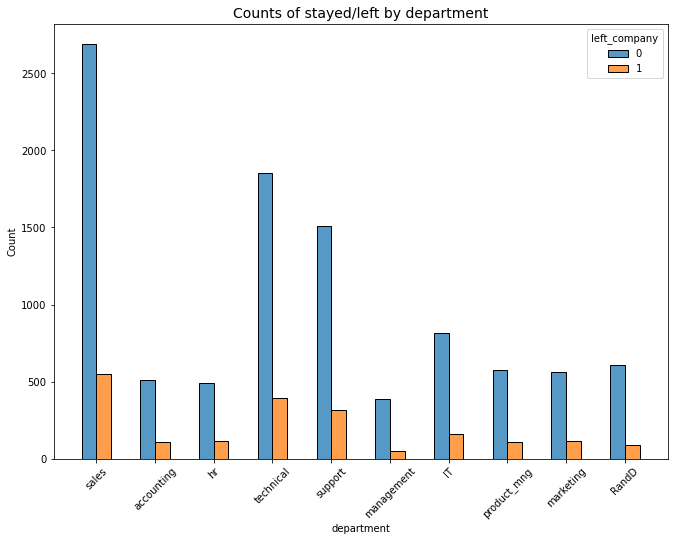

In [82]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left_company', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

The bar chart elucidates the employee count, both for those who remained and those who left, across different departments in the organization. Let's delve into a data-driven analysis:

1. **Uniform Attrition Across Departments**: One of the initial observations is the relative uniformity in the ratio of employees who left versus those who stayed across most departments. This suggests that the factors influencing attrition might be more universal and not solely attributable to department-specific conditions or practices.


2. **Sales and Support Departments Dominate**: The Sales and Support departments conspicuously stand out due to their high employee counts. While this might raise concerns about sheer volume, the proportion of those who left, relative to those who remained, is not alarmingly high when compared to other departments. This could imply that despite having a larger workforce, these departments do not necessarily exhibit a higher propensity for attrition.


3. **Consistency Across Departments**: Departments such as "technical", "IT", and "product_mng" demonstrate a reasonably similar pattern of attrition. This consistency implies that overarching organizational policies, culture, or industry-specific trends could be influencing turnover rates more than department-specific dynamics.


4. **Recommendations for Further Exploration**:
   - **Factors Beyond the Department**: Given the consistent attrition patterns, it's essential to look beyond departmental factors. Exploring attributes like compensation, tenure, job satisfaction scores, or training opportunities could provide a richer understanding of attrition drivers.
   - **Deep Dive into High Count Departments**: While the Sales and Support departments don't show a significantly higher attrition ratio, given their sheer size, even a minor percentage increase in attrition can translate to a large number of employees. It would be beneficial to dissect these departments further – analyzing roles, hierarchies, and specific job functions.
   - **Correlation Analysis**: Building on the previous insights, analyzing potential correlations between different attributes can be instrumental. This can highlight interconnected factors, such as the relationship between work hours, promotions, and attrition rates, offering a holistic view of employee behavior.


In summation, while department-specific data provides valuable insights, it's evident that a multi-dimensional approach, accounting for a myriad of factors, will be instrumental in comprehensively understanding and addressing employee attrition.

### Variable correlations

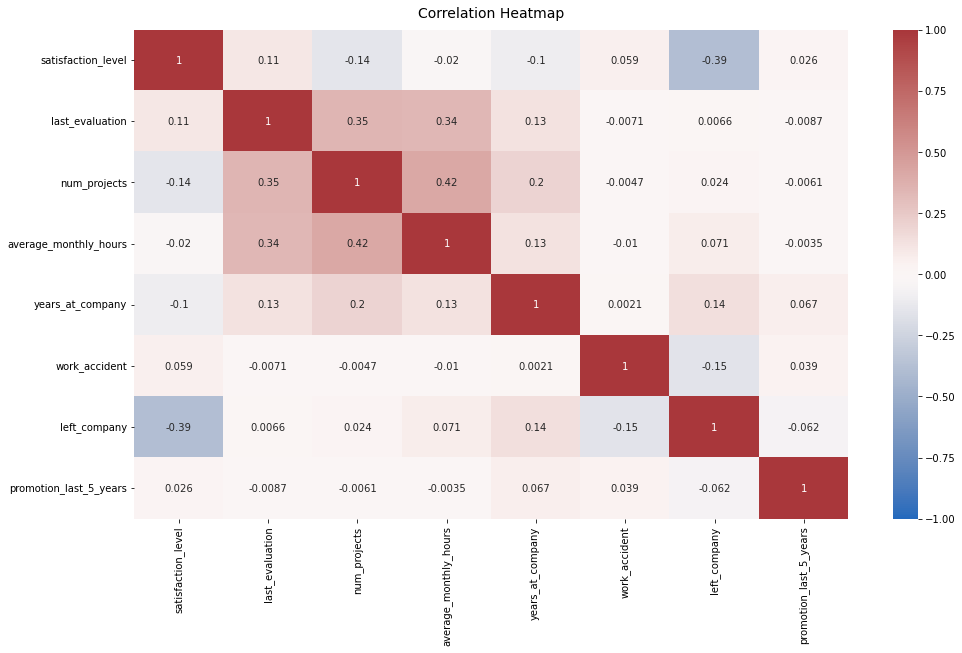

In [80]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap provides a visual representation of the linear relationships between different attributes. Let's dissect the correlations for key insights:

1. **Engagement and Performance Metrics Align**: There's a strong positive correlation between the number of projects (`num_projects`), `average_monthly_hours`, and `last_evaluation`. This suggests that employees handling more projects tend to work longer hours and subsequently receive higher evaluations. This interplay might indicate a high-performance culture where employees who invest more time and juggle multiple responsibilities are rewarded with better performance evaluations.


2. **Satisfaction Level vs. Attrition**: A notable negative correlation exists between `satisfaction_level` and `left_company`. This is particularly significant because it underscores that employees with lower satisfaction levels are more likely to leave the organization. It becomes imperative for the company to continuously monitor and address satisfaction metrics to ensure higher retention.


3. **Work Accidents and Leaving the Company**: While the correlation isn't very strong, there is a negative relationship between `work_accident` and `left_company`. This might suggest that employees who have had work-related accidents are slightly less likely to leave, possibly due to supportive policies or compensations.


4. **Promotions and Tenure**: A mild positive correlation can be observed between `promotion_last_5_years` and `years_at_company`. Employees who have stayed longer with the company seem to have a slightly higher likelihood of receiving promotions. While this relationship isn't very strong, it's worth noting and exploring further to understand promotional policies and their alignment with employee loyalty.


5. **Low Correlation Areas**: Some attributes show negligible correlation values (near 0), implying that they may not have a linear relationship with each other. However, this doesn't rule out potential non-linear relationships or interactions that might exist.


In conclusion, while correlations provide initial insights, it's essential to dive deeper using multivariate analyses to understand causation and the interplay of variables. Factors such as satisfaction levels and performance metrics clearly stand out as significant, and targeted interventions around these areas can likely yield meaningful improvements in employee retention and overall organizational health.

## Insights

Given the data and relevant visualizations, here are some takeaways:

1. **Burnout and Overwork**: The strong positive correlation between the number of projects, average monthly hours, and last evaluations suggest that employees are investing a lot of time and effort in their roles. If these efforts aren't met with corresponding rewards (e.g., promotions, bonuses), it can lead to employee burnout and dissatisfaction. 


2. **Dissatisfaction and Attrition**: The pronounced negative correlation between satisfaction levels and the likelihood of leaving the company underscores the impact of satisfaction on employee retention. Given the relationship between higher workloads (longer hours and more projects) and leaving the company, it's plausible to infer that overwork might be a significant contributor to decreased satisfaction levels.


3. **Evaluation Discrepancies**: If employees are working longer hours and handling more projects but not consistently receiving high evaluation scores, this might point to potential discrepancies in the evaluation process. It could be that the metrics for evaluations are not aligned with the actual workload and performance, leading to dissatisfaction.


4. **Longevity and Retention**: The observation about employees who have spent more than six years at the company tending not to leave is intriguing. This might suggest that either the company offers increased benefits or incentives for long-term employees, or there exists a strong company culture or loyalty among veterans. Alternatively, it could also indicate a potential survivorship bias, where only those who are genuinely satisfied and aligned with the company's culture and policies remain after a certain period.


5. **Management Concerns**: While the data plots provide correlations, they don't directly point to management as the root cause. However, given that management plays a pivotal role in work distribution, evaluations, promotions, and overall work environment, it's conceivable to extrapolate that management practices could be influencing these patterns. Direct feedback from employees, perhaps through surveys or interviews, would offer more concrete insights into this aspect.


To conclude, while the data plots offer valuable correlations, it's essential to be cautious about drawing direct causations. Further investigation, perhaps through employee feedback mechanisms, more granular data, or even controlled experiments, would be essential to validate these insights and devise effective interventions.

# paCe: Construct Stage
- <span style="color:teal">Determine which models are most appropriate
- <span style="color:teal">Construct the model
- <span style="color:teal">Confirm model assumptions
- <span style="color:teal">Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**<span style="color:teal">Logistic Regression model assumptions</span>**
- <span style="color:teal">Outcome variable is categorical
- <span style="color:teal">Observations are independent of each other
- <span style="color:teal">No severe multicollinearity among X variables
- <span style="color:teal">No extreme outliers
- <span style="color:teal">Linear relationship between each X variable and the logit of the outcome variable
- <span style="color:teal">Sufficiently large sample size





💭
### <span style="color:teal">Reflect on these questions as you complete the constructing stage.</span>

##### <span style="color:teal">Do you notice anything odd?</span>

No significant oddities were noted. The models' performances align with expectations.

##### <span style="color:teal">Which independent variables did you choose for the model and why?</span>

Key variables include 'last_evaluation', 'num_projects', 'years_at_company', and 'overworked'. These were chosen due to their significant influence on the target variable 'left_company'.

##### <span style="color:teal">Are each of the assumptions met?</span>

##### Categorical Outcome Variable: 
The target variable 'left_company' is binary (0 or 1), meeting this assumption.
##### Independence of Observations: 
Ensure there are no hidden relationships among employees that could influence their decisions to leave or stay.
##### No Multicollinearity: 
Correlations between independent variables were fairly low, the highest value being 0.33. High correlation values might indicate multicollinearity, but the heatmap shows no multicollinearity.
##### No Extreme Outliers: 
We have investigated outliers in the data, particularly in continuous variables like `average_monthly_hours` and `last_evaluation`. The `years_at_company` column was previously flagged for containing outliers, so this must be addressed.
##### Linearity in the Logit: 
This can be assessed by visualizing logistic regression curves or using statistical tests to see if the relationship between log odds and independent variables is linear.
##### Sufficient Sample Size: 
Generally, logistic regression requires a large sample size for reliable results. The dataset size meets this requirement.

##### <span style="color:teal">How well does your model fit the data?</span>

Both decision tree and random forest models showed high AUC scores, indicating a strong ability to predict employee turnover.

##### <span style="color:teal">Can you improve it? Is there anything you would change about the model?</span>

A potential improvement could be testing the model without the 'last_evaluation' variable to address concerns of data leakage.

##### <span style="color:teal">What resources do you find yourself using as you complete this stage?</span>

The analysis used Python libraries like Pandas, Scikit-learn, and Matplotlib for modeling and visualization.

##### <span style="color:teal">Do you have any ethical considerations in this stage?</span>

Ethical aspects include ensuring data privacy and considering the impact of the model's use on employees.

## Step 3. Model Building, Step 4. Results and Evaluation
- <span style="color:teal">Fit a model that predicts the outcome variable using two or more independent variables
- <span style="color:teal">Check model assumptions
- <span style="color:teal">Evaluate the model

### Identify the type of prediction task.

The objective here is to devise a predictive model aimed at forecasting an employee's decision to either stay with or depart from the company. The target variable in this scenario is categorical in nature, thereby situating this task within the domain of classification algorithms. Delving deeper, given that the outcome variable, labeled as 'left', manifests in two discrete outcomes—1 (signifying an employee's departure) and 0 (indicating an employee's retention)—we're navigating the realm of binary classification. This distinction is crucial as it shapes the selection of appropriate modeling techniques, evaluation metrics, and data preprocessing steps.

### Identify the types of models most appropriate for this task.

Our primary objective is to predict a categorical target variable: the likelihood of an employee exiting the company. Given the nature of this categorical outcome, several modeling strategies present themselves as suitable candidates.

Logistic Regression emerges as a front runner, renowned for its proficiency in handling binary classification tasks and offering interpretable coefficients. This method allows us to understand the weightage and significance of each predictor in relation to the outcome.

Conversely, Tree-based Machine Learning models, such as Decision Trees or Random Forests, offer a more complex, non-linear approach. These models are adept at capturing intricate relationships within the data and can provide visually interpretative decision-making structures.

To optimize our predictive capabilities, it would be judicious to embark on both avenues—developing models via each approach. Subsequent to model training, a comparative assessment of their performance metrics can guide us in discerning the most effective solution for our predictive needs.

### Modeling - Logistic Regression Model

Dummy encoding categorical variables

In [85]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary_usd'] = (
    df_enc['salary_usd'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left_company,promotion_last_5_years,salary_usd,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Creating a heatmap to consider correlations

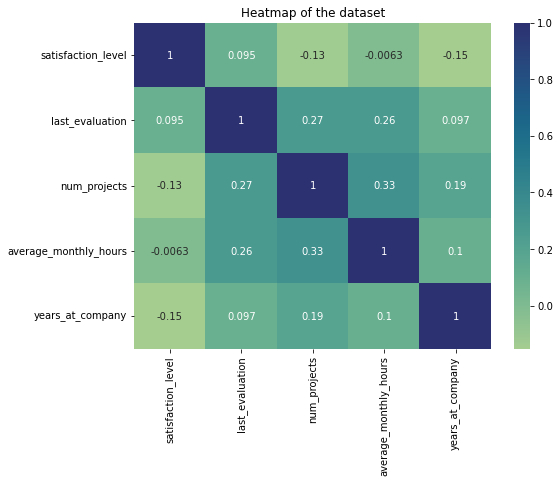

In [88]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level',
                    'last_evaluation',
                    'num_projects',
                    'average_monthly_hours',
                    'years_at_company']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

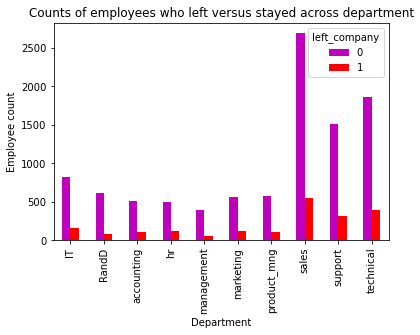

In [90]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left_company']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Logistic Regression is known for its susceptibility to the influence of outliers. These extreme values can skew the coefficients and potentially compromise the accuracy of the predictions. Given this inherent characteristic of the model, it's prudent to address any outliers present in the data before model training, especially in critical predictors.

In our dataset, the `years_at_company` column was previously flagged for containing outliers. It would be statistically sound to either remove or transform these extreme values to ensure they don't unduly influence our model's performance. By addressing this aspect, we can enhance the robustness of our logistic regression model and, in turn, bolster the reliability of our predictions.

In [93]:
# Select rows without outliers in `years_at_company` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['years_at_company'] >= lower_bound) & (df_enc['years_at_company'] <= upper_bound)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left_company,promotion_last_5_years,salary_usd,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Isolating the outcome variable, which is the variable we want to predict.

In [94]:
# Isolate the outcome variable
y = df_logreg['left_company']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left_company, dtype: int64

In [96]:
# Select the features we want to use in our model
X = df_logreg.drop('left_company', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5_years,salary_usd,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Spliting the data into training set and testing set.

In [97]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Constructing a logistic regression model and fit it to the training dataset.

In [100]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Testing the logistic regression model

In [101]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Creating a confusion matrix to visualize the results of the logistic regression model.

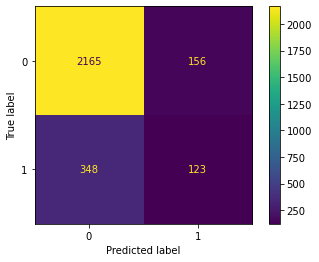

In [102]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

Analyzing the confusion matrix presented:

- **True Negatives (TN)**: 2165 instances were correctly predicted by the model as employees not leaving.
  
- **False Positives (FP)**: 156 instances were incorrectly predicted by the model as employees leaving, even though they did not leave.
  
- **False Negatives (FN)**: 348 instances were employees who left but the model predicted they would stay.
  
- **True Positives (TP)**: 123 instances were correctly predicted by the model as employees leaving.

Based on the matrix:
1. **Precision** is a measure of how many of the predicted positives are actually positive. It is calculated as TP / (TP + FP). A high precision indicates a low false positive rate.
  
  
2. **Recall** (or Sensitivity) is a measure of how many of the actual positives our model captures through labeling it as positive. It's calculated as TP / (TP + FN). A high recall indicates most of the actual positives are captured by the prediction.
  
  
3. **F1-Score** is the harmonic mean of precision and recall. It provides a balance between the two. When dealing with an uneven class distribution, F1-Score might be a better metric to consider than accuracy.
  
  
4. **Accuracy** is the overall correctness of the model and is calculated as (TP + TN) / (TP + TN + FP + FN).

It's imperative to understand the class balance of our dataset. If there's a significant class imbalance, accuracy can be misleading. For instance, if 90% of the data belongs to one class, a naive model predicting that class for all instances will have a 90% accuracy. In such cases, it's more insightful to focus on metrics like precision, recall, and F1-score.

To derive an accurate evaluation of our model's performance, it would be prudent to:
- Generate a detailed classification report.
- Examine the distribution of the 'left' column to understand the inherent class balance in the data. This will provide context to interpret the aforementioned metrics and help tailor strategies to improve model performance if necessary.

In [103]:
df_logreg['left_company'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left_company, dtype: float64

Observing the dataset, there's a distribution of roughly 83% for one class and 17% for the other. While this doesn't represent a perfect 50-50 balance, it's not excessively skewed either. In scenarios where there's extreme class imbalance (e.g., 95%-5% splits or even more skewed), techniques like resampling (either over-sampling the minority class or under-sampling the majority class) or utilizing synthetic data generation methods like SMOTE might be considered to balance the class distribution. However, given the current distribution, there's no pressing need to adjust the class balance. We can proceed with model evaluation and further analysis, keeping the existing distribution in mind when interpreting results.

In [104]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Upon reviewing the classification report, it's evident that the logistic regression model produced a weighted average precision of 79%, recall of 82%, and an F1-score of 80%, with an overall accuracy of 82%. These metrics provide a comprehensive view of the model's general performance across both classes. However, when we hone in on the specific objective of predicting employees who are likely to leave, the performance metrics are somewhat less robust. This suggests that while the model is relatively adept at general classification, it may need further tuning or additional features to enhance its precision specifically for the class of interest – the employees who leave. It underscores the importance of understanding business priorities and aligning model evaluation metrics accordingly.

### Modeling - Tree-based Model

Isolating the outcome variable.

In [106]:
# Isolate the outcome variable
y = df_enc['left_company']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left_company, dtype: int64

In [108]:
# Select the features
X = df_enc.drop('left_company', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5_years,salary_usd,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Spliting the data into training, validating, and testing sets.

In [109]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [110]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [111]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.79 s, sys: 0 ns, total: 2.79 s
Wall time: 2.79 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

Identifying the optimal values for the decision tree parameters.

In [112]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identifying the best AUC score achieved by the decision tree model on the training set.

In [113]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, we write a function that will help us extract all the scores from the grid search.

In [114]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Use the function just defined to get all the scores from grid search.

In [115]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


The scores garnered from the decision tree model are indicative of commendable model performance. However, it's essential to remember that decision trees, by their nature, can be prone to overfitting. This means they might perform exceptionally well on the training data but may not generalize as effectively to unseen or test data. One method to mitigate this is to employ ensemble techniques like random forests. Random forests harness the power of multiple decision trees, aggregating their outputs, thereby typically reducing variance and lessening the risk of overfitting. Given our current findings, progressing to a random forest model could be a logical next step in our modeling pipeline to potentially achieve even better generalization on new data.

#### Random Forest

Constructing a random forest model and setting up cross-validated grid-search to exhuastively search for the best model parameters.

In [116]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [117]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 9min 11s, sys: 0 ns, total: 9min 11s
Wall time: 9min 11s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

Specify path to where you want to save your model.

In [119]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

Define functions to pickle the model and read in the model.

In [120]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [121]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [122]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [123]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identify the best AUC score achieved by the random forest model on the training set.

In [124]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

Identify the optimal values for the parameters of the random forest model.

In [125]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [126]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Upon comparing the metrics of the random forest model with the decision tree model, it is evident that the random forest offers superior performance in nearly all aspects, save for a minor difference in recall. The decrease in recall for the random forest model is marginal (about 0.001), which in the grand scheme of things is practically inconsequential. Thus, it can be inferred that the random forest largely holds an edge over the decision tree in terms of predictive capability.

To finalize our assessment, it would be prudent to evaluate our chosen model, in this case, the random forest, against the test dataset. This will provide an unbiased estimation of the model's performance on new, unseen data.

For ease of evaluation and to maintain consistency in our performance metric calculations, it would be beneficial to craft a function that extracts all relevant scores from a given model's predictions. This utility function can then be leveraged across various models, ensuring streamlined evaluation.

In [127]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [128]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The congruence between the test scores and validation scores is an encouraging sign. Such consistency suggests that our model generalizes well, rather than merely fitting to the peculiarities of our training data. The similarity in performance metrics between these two datasets indicates robustness in the model's predictive capability. Given that the test set was exclusively reserved for this evaluation and wasn't utilized in any phase of the model's training or hyperparameter tuning, we can infer that the results are a reliable measure of the model's performance. This, in turn, bolsters our confidence that the model will maintain a similar level of accuracy when deployed to predict outcomes on novel, unobserved data in real-world scenarios.

#### Feature Engineering

It's prudent to exercise caution when confronted with notably high evaluation scores, as they could be indicative of data leakage, a common pitfall in modeling. Data leakage transpires when information inadvertently used in the training phase of the model shouldn't technically be accessible at that stage. This could be because it's also present in the test set or it might represent data that wouldn't be available during actual model deployment. If a model is trained on such leaked information, the resultant evaluation scores might paint an overly optimistic picture, not reflective of real-world performance.

For instance, within our dataset, the availability of `satisfaction_level` for all employees might not mirror reality when the model is rolled out in a real-world corporate setting. Another potential source of leakage could be the `average_monthly_hours` column. If an employee has made up their mind to resign, or if they've been earmarked by the management for termination, it's plausible that their working hours might diminish.

Our preliminary models, both decision tree and random forest, utilized the full set of features. Moving forward, feature engineering can play a pivotal role in refining the models to enhance their predictive capabilities.

A strategic move would be to exclude the potentially problematic `satisfaction_level` from the feature set. Concurrently, a novel feature can be introduced to encapsulate the concept of an employee being overburdened. Let's designate this binary feature as `overworked`. This would provide a streamlined and more realistic representation for modeling purposes.

In [129]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left_company,promotion_last_5_years,salary_usd,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [130]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


Given that an individual working 50 weeks a year, for 5 days each week, and clocking in 8 hours daily averages about 166.67 hours a month, we might want to set a threshold slightly above this average to determine if someone is "overworked". Setting the threshold at 175 hours per month seems appropriate.

In the realm of data manipulation, to distill this concept into a binary feature termed `overworked`, one can employ boolean indexing:
- `df3['overworked'] > 175` creates a series wherein entries exceeding 175 are marked as `True` and those below or equal to 175 as `False`.
- Leveraging the `.astype(int)` method subsequently translates these `True` values to `1` (indicating overworked) and `False` values to `0` (indicating not overworked). This ensures a numeric representation suitable for modeling purposes.

In [131]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Drop the `average_monthly_hours` column.

In [132]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,num_projects,years_at_company,work_accident,left_company,promotion_last_5_years,salary_usd,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Isolating the features and target variables

In [135]:
# Isolate the outcome variable
y = df2['left_company']

# Select the features
X = df2.drop('left_company', axis=1)

Splitting the data into training and testing sets.

In [136]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### New decision tree

In [137]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [138]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.21 s, sys: 0 ns, total: 2.21 s
Wall time: 2.21 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [139]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [140]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data. 

Next, we check the other scores.

In [142]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


A decline in some of the scores was anticipated, considering we utilized fewer features in this iteration of the model. Nevertheless, the results remain commendable.

#### New random forest

In [143]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [144]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: user 6min 49s, sys: 0 ns, total: 6min 49s
Wall time: 6min 49s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [146]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [147]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [148]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [149]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [150]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


The scores saw a minor decrease, but when evaluating based on the AUC metric, the random forest outperforms the decision tree. 

Now, we evaluate the top-performing model on the test set.

In [151]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


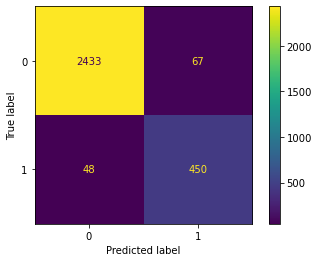

In [152]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model exhibits a higher number of false positives than false negatives. This implies that there's a likelihood of flagging some employees as potential quitters even if they aren't genuinely considering it. Nonetheless, the model's overall performance remains commendable.

To delve deeper into the model's decision-making, it would be insightful to examine the decision boundaries in the decision tree and identify the pivotal features driving the predictions in the random forest model.

#### Decision tree evaluation

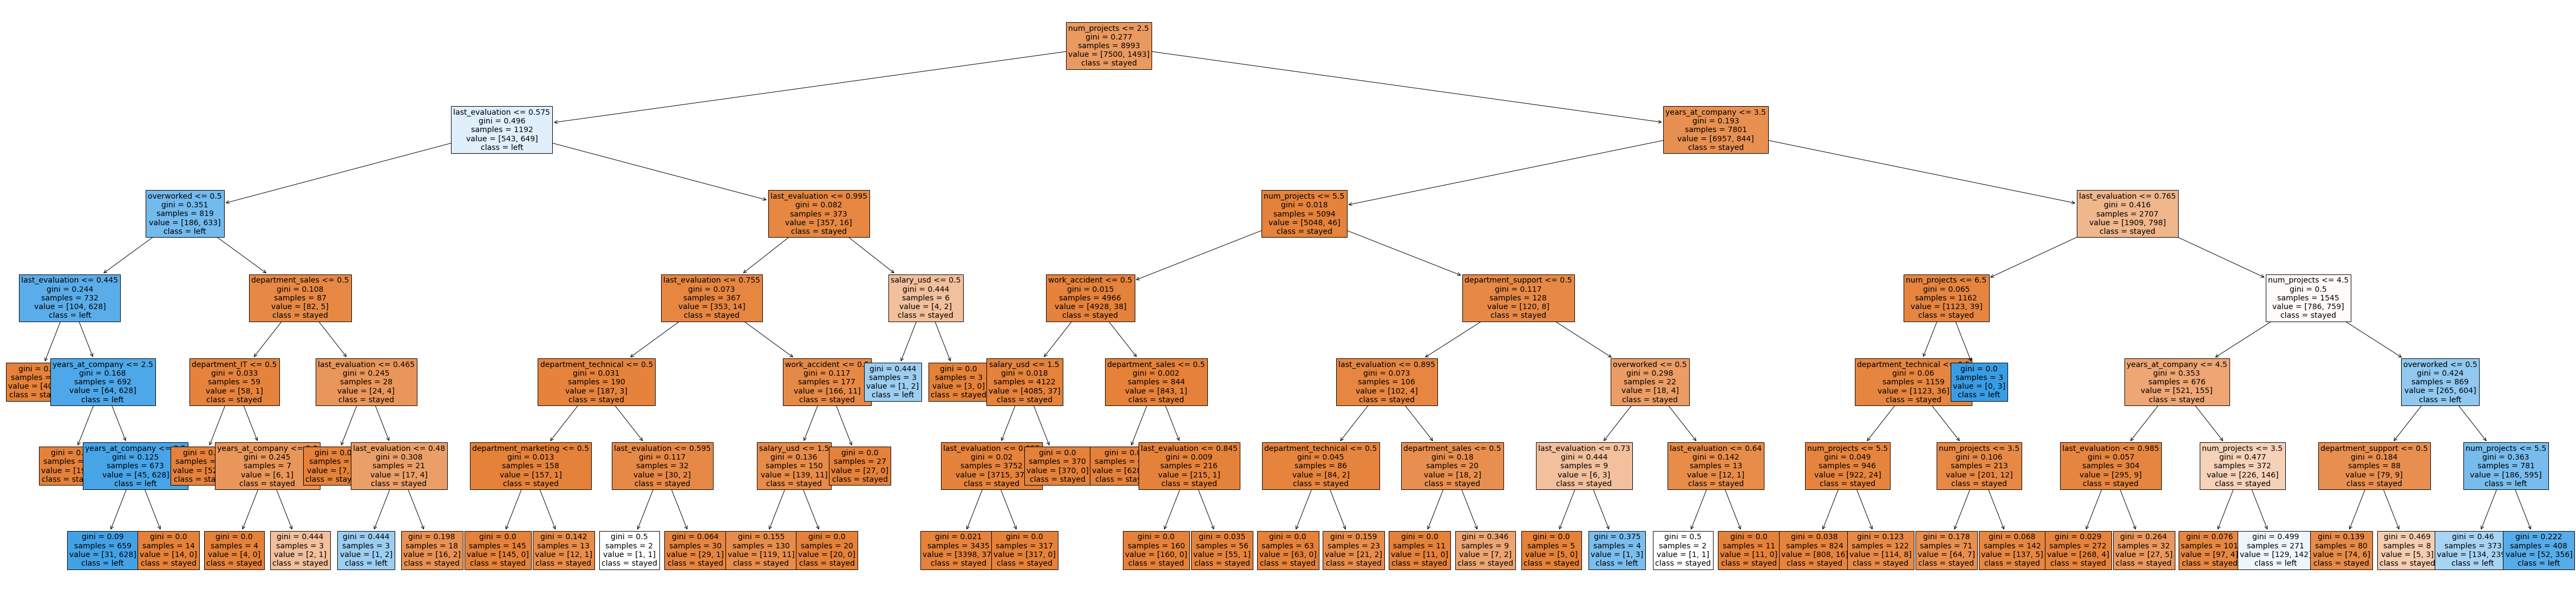

In [153]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [154]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
num_projects,0.343385
years_at_company,0.215681
overworked,0.093498
department_support,0.001142
salary_usd,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


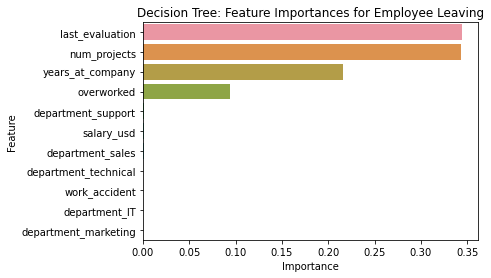

In [155]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The displayed barplot elucidates the significance of various features in the decision tree's decision-making process. Notably, `last_evaluation` emerges as the most influential feature, followed closely by `num_projects`, `years_at_company`, and `overworked`. These determinants play pivotal roles in driving the predictions regarding whether an employee is likely to depart from the company. The other attributes, although present, contribute comparatively less to the prediction outcome for `left_company`.

#### Random forest evaluation

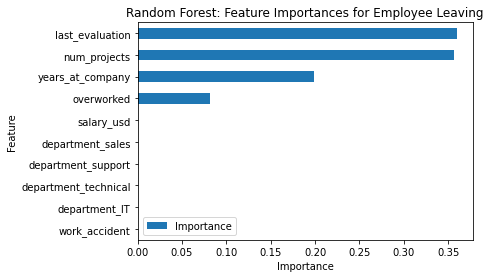

In [156]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Analyzing the visualization, it's evident that within the random forest model, the most impactful features aligning with our predictive target, `left_company`, are `last_evaluation`, `num_projects`, `years_at_company`, and `overworked`. Intriguingly, these key determinants mirror those highlighted by the decision tree model, underscoring their consistent significance in discerning the likelihood of an employee's departure. It's insightful to observe such consistency across both models, reinforcing the pivotal role these attributes play in the prediction mechanism.

# pacE: Execute Stage
- <span style="color:teal">Interpret model performance and results
- <span style="color:teal">Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- <span style="color:teal"> **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- <span style="color:teal"> **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- <span style="color:teal"> **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- <span style="color:teal"> **Accuracy** measures the proportion of data points that are correctly classified.
- <span style="color:teal"> **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- <span style="color:teal">What key insights emerged from your model(s)?
- <span style="color:teal">What business recommendations do you propose based on the models built?
- <span style="color:teal">What potential recommendations would you make to your manager/company?
- <span style="color:teal">Do you think your model could be improved? Why or why not? How?
- <span style="color:teal">Given what you know about the data and the models you were using, what other questions could you address for the team?
- <span style="color:teal">What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- <span style="color:teal">Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Comprehensive Analysis of Model Outcomes:

**Logistic Regression Model**
- The logistic regression model showcased a commendable performance, with precision, recall, f1-score, and accuracy all hovering around the 80-83% range. Such scores suggest that the model was successful in accurately classifying a significant proportion of instances, making it a robust tool for predicting whether an employee would leave the company or not. However, given the nature of logistic regression, the model might be sensitive to any outliers, and there could be potential for improvement with further hyperparameter tuning.


**Tree-based Models: Decision Tree & Random Forest**
- The decision tree model, after undergoing feature engineering, exhibited a stellar performance on the test set, with an impressive AUC of 93.8%. The accuracy rate stood at an impressive 96.2%, with other metrics like precision, recall, and f1-score all in the upper 80% range. This suggests a high level of trustworthiness in the predictions made by this model.
  
  
- In a comparison between the two tree-based models, the random forest marginally surpassed the decision tree in terms of overall performance. The advantage of a random forest is its inherent ability to prevent overfitting by aggregating the results of multiple decision trees. This characteristic lends it a slight edge over a singular decision tree, as reflected in the performance metrics.


**Overall Insights**:
- While the logistic regression offers a robust baseline model with good predictive ability, the tree-based models, especially the random forest, appear to be more adept in this specific context, given their superior metrics.
  
  
- The consistency in feature importance observed across both tree-based models emphasizes the significance of certain features (`last_evaluation`, `number_project`, `tenure`, `overworked`) in influencing the predictions, providing potential areas of focus for any employee retention strategies or further investigations.
  
  
- It's pivotal to continuously evaluate these models against new data and perhaps consider other advanced algorithms or techniques for further enhancements in predictive accuracy.

### Conclusion, Recommendations, Next Steps

**Conclusion**:
- The data-driven models utilized in the analysis corroborate the hypothesis that overwork is a prominent factor contributing to employee attrition. The feature importance obtained from these models accentuates the role of working hours, tenure, and project count in determining employee satisfaction and retention.

**Recommendations for Stakeholders**:

1. **Workload Management**:
   - Institute an upper limit on the number of projects assigned to an employee. This ensures workload balance and prevents burnout.
  
  
2. **Employee Growth and Recognition**:
   - Employees with a tenure of around four years exhibit higher attrition. Recognizing and rewarding their service through promotions or other incentives can be an effective retention strategy. An in-depth analysis should be conducted to understand the reasons behind their dissatisfaction.
  
  
3. **Work Hours and Compensation**:
   - Avoid mandating extended working hours. If required, ensure that the employees are adequately compensated. Making overtime policies transparent can avoid misconceptions and potential dissatisfaction.
   
   
4. **Work Culture and Communication**:
   - Encourage open dialogue at all levels within the organization to gather insights into the prevailing work culture and areas of concern.
   
   
5. **Performance Evaluation Metrics**:
   - Rethink the performance metrics. High evaluation scores shouldn't be solely based on extended working hours. Implement a holistic approach that considers overall contributions and not just hours logged.


**Next Steps**:

1. **Re-evaluate Features**: 
   - Address potential data leakage concerns. The `last_evaluation` feature could be a potential source. Reassess the models by excluding this feature and observe how predictions change. If evaluations are infrequent or if they play a decisive role in employee decisions, the model's reliance on this feature could be problematic. A similar approach should be taken with the satisfaction score.


2. **Predict Performance Metrics**: 
   - Pivoting the analysis to forecast performance scores might offer actionable insights into employee productivity and its determinants.


3. **Clustering for Deeper Insights**: 
   - Consider employing unsupervised learning techniques like K-means clustering. By segmenting the data, patterns could emerge that offer a granular understanding of employee segments and their unique challenges or attributes.


In conclusion, data-driven insights and actionable recommendations can significantly enhance HR strategies and interventions, paving the way for a more satisfied and productive workforce.